# Classification of Patients with Abnormal Blood Pressure

### Loading required libraries

In [4]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

np.random.seed(7)

### Loading training file

In [5]:
train_path =  'patients.csv'
train_df = pd.read_csv(train_path,',')

### Exploring the training data 

Getting the dimension of the data, along with the data types. 

In [6]:
print('Dimension of data :')
print(train_df.shape)
print('')

Dimension of data :
(2000, 15)



In [7]:
train_df.dtypes


Patient_Number                     int64
Blood_Pressure_Abnormality         int64
Level_of_Hemoglobin              float64
Genetic_Pedigree_Coefficient     float64
Age                                int64
BMI                                int64
Sex                                int64
Pregnancy                        float64
Smoking                            int64
Physical_activity                  int64
salt_content_in_the_diet           int64
alcohol_consumption_per_day      float64
Level_of_Stress                    int64
Chronic_kidney_disease             int64
Adrenal_and_thyroid_disorders      int64
dtype: object

In [8]:
train_df.head(10)

,Patient_Number,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,1,1,11.28,100.00,34,23,1,1.0,0,45961,48071,NaN,2,1,1
1,2,0,9.75,0.23,54,33,1,NaN,0,26106,25333,205.0,3,0,0
2,3,1,10.79,0.91,70,49,0,NaN,0,9995,29465,67.0,2,1,0
3,4,0,11.00,0.43,71,50,0,NaN,0,10635,7439,242.0,1,1,0
4,5,1,14.17,0.83,52,19,0,NaN,0,15619,49644,397.0,2,0,0
5,6,0,11.64,0.54,23,48,0,NaN,1,27042,7513,NaN,3,0,0
6,7,1,11.69,0.75,43,41,1,1.0,0,38369,32967,206.0,3,1,1
7,8,0,12.70,0.41,48,20,0,NaN,0,29781,26749,134.0,2,0,0
8,9,0,10.88,0.68,72,44,0,NaN,0,814,9607,99.0,3,0,0
9,10,1,14.56,0.61,40,44,0,NaN,0,1278,12715,95.0,2,0,0


In [9]:
train_df.describe()

,Patient_Number,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
count,2000.000000,2000.000000,2000.000000,1908.000000,2000.000000,2000.000000,2000.000000,442.000000,2000.000000,2000.000000,2000.000000,1758.000000,2000.000000,2000.0000,2000.000000
mean,1000.500000,0.494000,11.710035,0.546756,46.558500,30.081500,0.496000,0.450226,0.509500,25254.424500,24926.097000,251.008532,2.012500,0.5050,0.443500
std,577.494589,0.500089,2.186701,2.296605,17.107832,11.761208,0.500109,0.498080,0.500035,14015.439623,14211.692586,143.651884,0.823822,0.5001,0.496922
min,1.000000,0.000000,8.100000,0.000000,18.000000,10.000000,0.000000,0.000000,0.000000,628.000000,22.000000,0.000000,1.000000,0.0000,0.000000
25%,500.750000,0.000000,10.147500,0.240000,32.000000,20.000000,0.000000,0.000000,0.000000,13605.750000,13151.750000,126.250000,1.000000,0.0000,0.000000
50%,1000.500000,0.000000,11.330000,0.490000,46.000000,30.000000,0.000000,0.000000,1.000000,25353.000000,25046.500000,250.000000,2.000000,1.0000,0.000000
75%,1500.250000,1.000000,12.945000,0.740000,62.000000,40.000000,1.000000,1.000000,1.000000,37382.250000,36839.750000,377.750000,3.000000,1.0000,1.000000
max,2000.000000,1.000000,17.560000,100.000000,75.000000,50.000000,1.000000,1.000000,1.000000,49980.000000,49976.000000,499.000000,3.000000,1.0000,1.000000


As we can see from the current data description, there are few features from which data is missing like Genetic_Pedigree_Coefficient , Pregnancy etc.

#### Checking if data is skewed or not ?

In [10]:
abnormality = pd.Categorical(train_df["Blood_Pressure_Abnormality"])
abnormality

[1, 0, 1, 0, 1, ..., 1, 1, 1, 0, 1]
Length: 2000
Categories (2, int64): [0, 1]

In [11]:
abnormality = pd.Categorical(train_df["Blood_Pressure_Abnormality"])
abnormality = abnormality.rename_categories(["Normal","Abnormal"])
abnormality.describe()

,counts,freqs
categories,,
Normal,1012,0.506
Abnormal,988,0.494


Data seems to be equally distributed in the 2 classes.

In [12]:
Fill_train_df = train_df.copy(deep=True)

missing_Gen_Info = np.where(Fill_train_df["Genetic_Pedigree_Coefficient"].isnull() == True)
missing_Gen_Info

(array([  23,   44,   56,   68,   85,  102,  132,  149,  175,  187,  201,
         227,  233,  247,  277,  292,  339,  352,  397,  432,  438,  460,
         473,  491,  496,  503,  518,  526,  547,  565,  578,  652,  661,
         670,  684,  753,  756,  792,  833,  843,  873,  878,  894,  903,
         906,  925,  941,  944,  987, 1005, 1014, 1030, 1052, 1056, 1067,
        1074, 1125, 1127, 1133, 1147, 1166, 1178, 1188, 1196, 1210, 1267,
        1277, 1281, 1287, 1311, 1333, 1348, 1356, 1381, 1409, 1467, 1525,
        1563, 1570, 1593, 1701, 1712, 1721, 1739, 1751, 1855, 1857, 1907,
        1921, 1964, 1972, 1984]),)

In [13]:
print(len(missing_Gen_Info[0]))


92


##### Looking for outliers..

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4ac42d2f60>]],
      dtype=object)

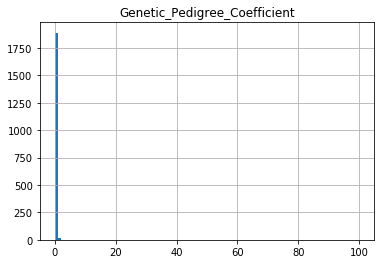

In [14]:
train_df.hist(column='Genetic_Pedigree_Coefficient',bins=100)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4ac4193d30>]],
      dtype=object)

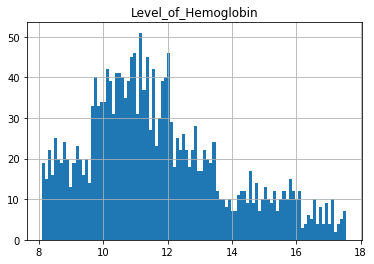

In [15]:
train_df.hist(column='Level_of_Hemoglobin',bins=100)

##### Filling missing data..

Filling missing data with the mean

In [16]:
gen = np.where(Fill_train_df["Genetic_Pedigree_Coefficient"].isnull(), 
                       0.49,                    
                       Fill_train_df["Genetic_Pedigree_Coefficient"])

In [17]:
Fill_train_df["Genetic_Pedigree_Coefficient"] = gen 
gen

# Fill_train_df["Genetic_Pedigree_Coefficient"].describe()

array([1.0e+02, 2.3e-01, 9.1e-01, ..., 2.2e-01, 7.2e-01, 9.0e-02])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4ac0880c88>]],
      dtype=object)

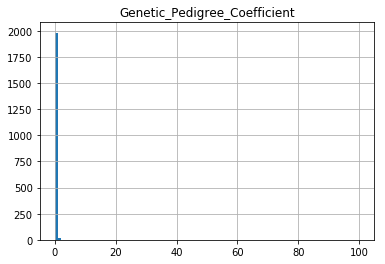

In [18]:
Fill_train_df.hist(column='Genetic_Pedigree_Coefficient',bins=100)

In [19]:
train_df["Genetic_Pedigree_Coefficient"].describe()

count    1908.000000
mean        0.546756
std         2.296605
min         0.000000
25%         0.240000
50%         0.490000
75%         0.740000
max       100.000000
Name: Genetic_Pedigree_Coefficient, dtype: float64

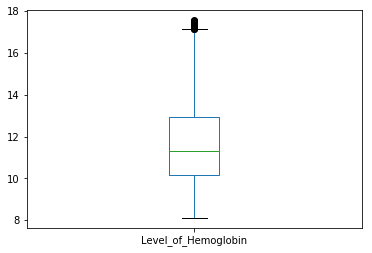

In [20]:
Fill_train_df["Level_of_Hemoglobin"].plot(kind="box")

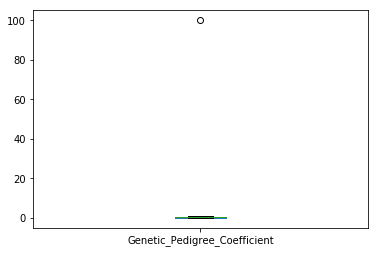

In [21]:
Fill_train_df["Genetic_Pedigree_Coefficient"].plot(kind="box")

### Removing whole rows with missing data..

As we can see in the above plot of Genetic_Pedigree_Coefficient that after filling the missing values with mean, it is more concentrated in the centre. As this may cause some problems while training, thus it is better to remove the whole records. The number of missing records are less than 5% thus it won't cause much issue.

In [22]:
train_df_missinValues = train_df.copy(deep=True)
train_df_missinValues = train_df_missinValues.loc[:,:'Genetic_Pedigree_Coefficient']
train_df_missinValues = train_df_missinValues.dropna(axis = 0)

In [23]:
train_df_missinValues.describe()

,Patient_Number,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient
count,1908.000000,1908.000000,1908.000000,1908.000000
mean,1003.972746,0.502096,11.706887,0.546756
std,578.751254,0.500127,2.183418,2.296605
min,1.000000,0.000000,8.100000,0.000000
25%,502.750000,0.000000,10.140000,0.240000
50%,1003.500000,1.000000,11.330000,0.490000
75%,1507.250000,1.000000,12.925000,0.740000
max,2000.000000,1.000000,17.560000,100.000000


### Normalizing the data..

The range of two features i.e. Level of Hemoglobin and Genetic Pedigree Coefficient are not in same range, thus it can make training more complex. It will be good if both can come under the same range.

In [24]:
from sklearn.preprocessing import MinMaxScaler

In [25]:
train_df_mv_norm = train_df_missinValues.copy(deep=True)
lvlOfHg = np.array(train_df_mv_norm['Level_of_Hemoglobin'])
scaler = MinMaxScaler().fit(lvlOfHg.reshape(-1, 1))
rescaled = scaler.transform(lvlOfHg.reshape(-1, 1))

train_df_mv_norm['Level_of_Hemoglobin'] = rescaled

In [26]:
train_df_mv_norm.describe()

,Patient_Number,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient
count,1908.000000,1908.000000,1908.000000,1908.000000
mean,1003.972746,0.502096,0.381278,0.546756
std,578.751254,0.500127,0.230805,2.296605
min,1.000000,0.000000,0.000000,0.000000
25%,502.750000,0.000000,0.215645,0.240000
50%,1003.500000,1.000000,0.341438,0.490000
75%,1507.250000,1.000000,0.510042,0.740000
max,2000.000000,1.000000,1.000000,100.000000


### Making data for training and validation

In [27]:
data = np.asarray(train_df_mv_norm.iloc[:,1:])
X, Y = data[:,1:],data[:,:1]

In [28]:
from sklearn.model_selection import train_test_split
Y = Y.reshape(Y.shape[0],)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    stratify=Y, 
                                                    test_size=0.2)

## Logistic Regression

Benefits of using LR:
- Simple and Linear
- Not much parameters to tune

Cons :
- Cannot handle non - linearities
- Cannot handle large number of features

In [29]:
from sklearn.linear_model import LogisticRegression
np.random.seed(7)
Y_train.reshape(1,Y_train.shape[0])
Y_test.reshape(1,Y_test.shape[0])
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
testY_temp = logreg.predict(X_test)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, Y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, Y_test)))

Accuracy of Logistic regression classifier on training set: 0.53
Accuracy of Logistic regression classifier on test set: 0.54


## Naive Bayes

Benefits of using NB:
- Easy and fast
- Works good for categorical variables
- Works well for multi class prediction.

Cons :
- If new category comes in the test data set, it fails to predict.
- Requires independent variables, independent variables are rare in real life problems.

Types :
- Gaussian 
- Multinomial
- Bernoulli

In [ ]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB().fit(X_train, Y_train)
testY_temp = clf.predict(X_test)
print('Accuracy of GaussianNB on training set: {:.2f}'
     .format(clf.score(X_train, Y_train)))
print('Accuracy of GaussianNB on test set: {:.2f}'
     .format(clf.score(X_test, Y_test)))

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000],'solver':('newton-cg', 'lbfgs', 'sag', 'saga')}
classifier = LogisticRegression()
clf = GridSearchCV(classifier, parameters)
clf.fit(X_train, Y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(clf.score(X_train, Y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(clf.score(X_test, Y_test)))
print(clf.best_estimator_)

### Decision Tree

Benefits of using DT:
- Uses decision rules.
- Can handle non linear data.
- Takes into account variable interaction.

Cons :
- Biased on training set.
- Overfits the training set.
- No ranking score, direct result.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, Y_train)
testY_temp = classifier.predict(X_test)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(classifier.score(X_train, Y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(classifier.score(X_test, Y_test)))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
parameters = {'criterion':('gini','entropy'),'max_features':(None,'auto','sqrt','log2')}
classifier = DecisionTreeClassifier()
clf = GridSearchCV(classifier, parameters)
clf.fit(X_train, Y_train)
testY_temp = clf.predict(X_test)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, Y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, Y_test)))
print(clf.best_estimator_)

### Random Forest

Benefits of using RF:
- Single decision tree tends to overfit the data. The process of averaging or combining the results of different decision trees helps to overcome the problem of overfitting.
- Works good for large range of data.
- Scaling is not necesary.
- Maintains accuracy even though data is missing.

Cons :
- Complex
- Time consuming
- Requires more computational resources.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()

classifier.fit(X_train, Y_train)
testY_temp = classifier.predict(X_test)
print('Accuracy of RandomForestClassifier on training set: {:.2f}'
     .format(classifier.score(X_train, Y_train)))
print('Accuracy of RandomForestClassifier on test set: {:.2f}'
     .format(classifier.score(X_test, Y_test)))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
parameters = {'n_estimators':[10,50,100],'criterion':('gini','entropy'),'max_features':(None,'auto','sqrt','log2')}
classifier = RandomForestClassifier()
clf = GridSearchCV(classifier, parameters)
clf.fit(X_train, Y_train)
testY_temp = clf.predict(X_test)
print('Accuracy of RandomForestClassifier on training set: {:.2f}'
     .format(clf.score(X_train, Y_train)))
print('Accuracy of RandomForestClassifier on test set: {:.2f}'
     .format(clf.score(X_test, Y_test)))
print(clf.best_estimator_)

### Gradient Boosting

Benefits of using GB:
- Builds each tree sequentially.
- Each new tree helps to correct errors made by previously trained tree. 
- Better learner than RF.

Cons :
- Prone to overfitting.
- Many parameters to tune.
- Not very speedy.

In [3]:
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier()
classifier.fit(X_train, Y_train)
testY_temp = classifier.predict(X_test)
print('Accuracy of GradientBoostingClassifier on training set: {:.2f}'
     .format(classifier.score(X_train, Y_train)))
print('Accuracy of GradientBoostingClassifier on test set: {:.2f}'
     .format(classifier.score(X_test, Y_test)))

/home/avanish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


NameError: name 'X_train' is not defined

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
parameters = {'n_estimators':[50,100,150,250],'loss' : ('deviance', 'exponential'),'max_features':('auto','sqrt','log2')}
classifier = GradientBoostingClassifier()
clf = GridSearchCV(classifier, parameters)
clf.fit(X_train, Y_train)
testY_temp = clf.predict(X_test)
print('Accuracy of GradientBoostingClassifier on training set: {:.2f}'
     .format(clf.score(X_train, Y_train)))
print('Accuracy of GradientBoostingClassifier on test set: {:.2f}'
     .format(clf.score(X_test, Y_test)))
print(clf.best_estimator_)

### K Nearest Neighbours

Benefits of using KNN:
- Simple to implement
- Flexible to feature / distance choices
- Effective if training data is large

Cons :
- Computation is quite high.
- Need to know no of nearest neighbours.
- Must know we have a meaningful distance function

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
parameters = {'n_neighbors':[3,5,7,10]}
classifier = KNeighborsClassifier()
clf = GridSearchCV(classifier, parameters)
clf.fit(X_train, Y_train)
testY_temp = clf.predict(X_test)
print('Accuracy of KNeighborsClassifier on training set: {:.2f}'
     .format(clf.score(X_train, Y_train)))
print('Accuracy of KNeighborsClassifier on test set: {:.2f}'
     .format(clf.score(X_test, Y_test)))
print(clf.best_estimator_)

### Support Vector Machine

Benefits of using SVM:
- Can handle large feature space
- Can handle non-linear feature interactions
- Do not rely on entire data

Cons :
- Computation is quite high.
- It can be tricky to find appropriate kernel sometimes

In [ ]:
from sklearn import svm
clf = svm.SVC()

clf.fit(X_train, Y_train)
testY_temp = clf.predict(X_test)
print('Accuracy of svm on training set: {:.2f}'
     .format(clf.score(X_train, Y_train)))
print('Accuracy of svm on test set: {:.2f}'
     .format(clf.score(X_test, Y_test)))


In [ ]:
from sklearn import svm
parameters = {'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000],'kernel' : ('linear', 'poly', 'rbf', 'sigmoid')}
classifier = svm.SVC()
clf = GridSearchCV(classifier, parameters)
clf.fit(X_train, Y_train)
testY_temp = clf.predict(X_test)
print('Accuracy of svm on training set: {:.2f}'
     .format(clf.score(X_train, Y_train)))
print('Accuracy of svm on test set: {:.2f}'
     .format(clf.score(X_test, Y_test)))
print(clf.best_estimator_)

### Multi Layer Perceptron

Benefits of using MLP:
- Can solve complex problems
- Can learn non-linear and complex problems
-  After learning from the initial inputs and their relationships, it can infer unseen relationships on unseen data as well, thus making the model generalize and predict on unseen data.

Cons :
- Training time is high
- Many parameters to tune

In [ ]:
from sklearn.neural_network import MLPClassifier
np.random.seed(7)
clf = MLPClassifier()
clf.fit(X_train, Y_train)
testY_temp = clf.predict(X_test)
print('Accuracy of mlp on training set: {:.2f}'
     .format(clf.score(X_train, Y_train)))
print('Accuracy of mlp on test set: {:.2f}'
     .format(clf.score(X_test, Y_test)))

In [ ]:
from sklearn.neural_network import MLPClassifier
parameters = {'activation' : ('logistic', 'tanh', 'relu'),'solver' : ('sgd', 'adam')}
classifier = MLPClassifier()
clf = GridSearchCV(classifier, parameters)
clf.fit(X_train, Y_train)
testY_temp = clf.predict(X_test)
print('Accuracy of mlp on training set: {:.2f}'
     .format(clf.score(X_train, Y_train)))
print('Accuracy of mlp on test set: {:.2f}'
     .format(clf.score(X_test, Y_test)))
print(clf.best_estimator_)

### Working with more features..

In [ ]:
AF_train_df = train_df.copy(deep=True)

In [ ]:
AF_train_df.describe()

In [ ]:
menP = np.where(AF_train_df["Sex"]== 0, 
                       0,                    
                       AF_train_df["Pregnancy"])

In [ ]:
AF_train_df["Pregnancy"] = menP 

In [ ]:
AF_train_df["Pregnancy"].describe()

In [ ]:
womenP = np.where((AF_train_df["Sex"]== 1) & (AF_train_df["Pregnancy"].isnull()), 
                       2,                    
                       AF_train_df["Pregnancy"])

In [ ]:
womenP

In [ ]:
AF_train_df["Pregnancy"] = womenP

In [ ]:
AF_train_df.describe()

In [ ]:
AF_train_df.corr()

In [ ]:
alc_con = np.where(AF_train_df["alcohol_consumption_per_day"].isnull(), 
                       250,                    
                       AF_train_df["alcohol_consumption_per_day"])

In [ ]:
AF_train_df["alcohol_consumption_per_day"] = alc_con 

In [ ]:
AF_train_df.describe()

In [ ]:
gen_c = np.where(AF_train_df["Genetic_Pedigree_Coefficient"].isnull(), 
                       0.49,                    
                       AF_train_df["Genetic_Pedigree_Coefficient"])
AF_train_df["Genetic_Pedigree_Coefficient"] = gen_c

In [ ]:
AF_train_df.describe()

In [ ]:
scaler = MinMaxScaler().fit(AF_train_df)
rescaled = scaler.transform(AF_train_df)

AF_train_df =  pd.DataFrame(rescaled)

In [ ]:
AF_train_df.describe()

In [ ]:
data = np.asarray(AF_train_df.iloc[:,1:])
X, Y = data[:,1:],data[:,:1]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    stratify=Y, 
                                                    test_size=0.2)

In [ ]:
Y_train =Y_train.reshape(Y_train.shape[0],)
Y_test =Y_test.reshape(Y_test.shape[0],)
parameters = {'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000],'solver':('newton-cg', 'lbfgs', 'sag', 'saga')}
classifier = LogisticRegression()
clf = GridSearchCV(classifier, parameters)
clf.fit(X_train, Y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(clf.score(X_train, Y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(clf.score(X_test, Y_test)))
print(clf.best_estimator_)

In [ ]:
clf = GaussianNB().fit(X_train, Y_train)
testY_temp = clf.predict(X_test)
print('Accuracy of GaussianNB on training set: {:.2f}'
     .format(clf.score(X_train, Y_train)))
print('Accuracy of GaussianNB on test set: {:.2f}'
     .format(clf.score(X_test, Y_test)))

In [ ]:
parameters = {'criterion':('gini','entropy'),'max_features':(None,'auto','sqrt','log2')}
classifier = DecisionTreeClassifier()
clf = GridSearchCV(classifier, parameters)
clf.fit(X_train, Y_train)
testY_temp = clf.predict(X_test)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, Y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, Y_test)))
print(clf.best_estimator_)

In [ ]:
parameters = {'n_estimators':[10,50,100],'criterion':('gini','entropy'),'max_features':(None,'auto','sqrt','log2')}
classifier = RandomForestClassifier()
clf = GridSearchCV(classifier, parameters)
clf.fit(X_train, Y_train)
testY_temp = clf.predict(X_test)
print('Accuracy of RandomForestClassifier on training set: {:.2f}'
     .format(clf.score(X_train, Y_train)))
print('Accuracy of RandomForestClassifier on test set: {:.2f}'
     .format(clf.score(X_test, Y_test)))
print(clf.best_estimator_)

In [ ]:
parameters = {'n_estimators':[50,100,150,250],'loss' : ('deviance', 'exponential'),'max_features':('auto','sqrt','log2')}
classifier = GradientBoostingClassifier()
clf = GridSearchCV(classifier, parameters)
clf.fit(X_train, Y_train)
testY_temp = clf.predict(X_test)
print('Accuracy of GradientBoostingClassifier on training set: {:.2f}'
     .format(clf.score(X_train, Y_train)))
print('Accuracy of GradientBoostingClassifier on test set: {:.2f}'
     .format(clf.score(X_test, Y_test)))
print(clf.best_estimator_)

In [ ]:
parameters = {'n_neighbors':[3,5,7,10]}
classifier = KNeighborsClassifier()
clf = GridSearchCV(classifier, parameters)
clf.fit(X_train, Y_train)
testY_temp = clf.predict(X_test)
print('Accuracy of KNeighborsClassifier on training set: {:.2f}'
     .format(clf.score(X_train, Y_train)))
print('Accuracy of KNeighborsClassifier on test set: {:.2f}'
     .format(clf.score(X_test, Y_test)))
print(clf.best_estimator_)

In [ ]:
parameters = {'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000],'kernel' : ('linear', 'poly', 'rbf', 'sigmoid')}
classifier = svm.SVC()
clf = GridSearchCV(classifier, parameters)
clf.fit(X_train, Y_train)
testY_temp = clf.predict(X_test)
print('Accuracy of svm on training set: {:.2f}'
     .format(clf.score(X_train, Y_train)))
print('Accuracy of svm on test set: {:.2f}'
     .format(clf.score(X_test, Y_test)))
print(clf.best_estimator_)

In [ ]:
parameters = {'activation' : ('logistic', 'tanh', 'relu'),'solver' : ('sgd', 'adam'),'hidden_layer_sizes': [(1000), (200), (250)],}
classifier = MLPClassifier()
clf = GridSearchCV(classifier, parameters)
clf.fit(X_train, Y_train)
testY_temp = clf.predict(X_test)
print('Accuracy of mlp on training set: {:.2f}'
     .format(clf.score(X_train, Y_train)))
print('Accuracy of mlp on test set: {:.2f}'
     .format(clf.score(X_test, Y_test)))
print(clf.best_estimator_)

### Feature Selection

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# feature extraction
test = SelectKBest(score_func=chi2, k=8)
fit = test.fit(X, Y)
# summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)
X_new = fit.transform(X)
print(len(X_new))
# summarize selected features
print(X_new[0:5,:])

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_new, Y,
                                                    stratify=Y, 
                                                    test_size=0.2)

In [ ]:
Y_train =Y_train.reshape(Y_train.shape[0],)
Y_test =Y_test.reshape(Y_test.shape[0],)
parameters = {'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000],'solver':('newton-cg', 'lbfgs', 'sag', 'saga')}
classifier = LogisticRegression()
clf = GridSearchCV(classifier, parameters)
clf.fit(X_train, Y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(clf.score(X_train, Y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(clf.score(X_test, Y_test)))
print(clf.best_estimator_)

print(' ')
clf = GaussianNB().fit(X_train, Y_train)
testY_temp = clf.predict(X_test)
print('Accuracy of GaussianNB on training set: {:.2f}'
     .format(clf.score(X_train, Y_train)))
print('Accuracy of GaussianNB on test set: {:.2f}'
     .format(clf.score(X_test, Y_test)))
print(' ')
parameters = {'criterion':('gini','entropy'),'max_features':(None,'auto','sqrt','log2')}
classifier = DecisionTreeClassifier()
clf = GridSearchCV(classifier, parameters)
clf.fit(X_train, Y_train)
testY_temp = clf.predict(X_test)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, Y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, Y_test)))
print(clf.best_estimator_)
print(' ')
parameters = {'n_estimators':[10,50,100],'criterion':('gini','entropy'),'max_features':(None,'auto','sqrt','log2')}
classifier = RandomForestClassifier()
clf = GridSearchCV(classifier, parameters)
clf.fit(X_train, Y_train)
testY_temp = clf.predict(X_test)
print('Accuracy of RandomForestClassifier on training set: {:.2f}'
     .format(clf.score(X_train, Y_train)))
print('Accuracy of RandomForestClassifier on test set: {:.2f}'
     .format(clf.score(X_test, Y_test)))
print(clf.best_estimator_)
print(' ')
parameters = {'n_estimators':[50,100,150,250],'loss' : ('deviance', 'exponential'),'max_features':('auto','sqrt','log2')}
classifier = GradientBoostingClassifier()
clf = GridSearchCV(classifier, parameters)
clf.fit(X_train, Y_train)
testY_temp = clf.predict(X_test)
print('Accuracy of GradientBoostingClassifier on training set: {:.2f}'
     .format(clf.score(X_train, Y_train)))
print('Accuracy of GradientBoostingClassifier on test set: {:.2f}'
     .format(clf.score(X_test, Y_test)))
print(clf.best_estimator_)
print(' ')
parameters = {'n_neighbors':[3,5,7,10]}
classifier = KNeighborsClassifier()
clf = GridSearchCV(classifier, parameters)
clf.fit(X_train, Y_train)
testY_temp = clf.predict(X_test)
print('Accuracy of KNeighborsClassifier on training set: {:.2f}'
     .format(clf.score(X_train, Y_train)))
print('Accuracy of KNeighborsClassifier on test set: {:.2f}'
     .format(clf.score(X_test, Y_test)))
print(clf.best_estimator_)
print(' ')
parameters = {'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000],'kernel' : ('linear', 'poly', 'rbf', 'sigmoid')}
classifier = svm.SVC()
clf = GridSearchCV(classifier, parameters)
clf.fit(X_train, Y_train)
testY_temp = clf.predict(X_test)
print('Accuracy of svm on training set: {:.2f}'
     .format(clf.score(X_train, Y_train)))
print('Accuracy of svm on test set: {:.2f}'
     .format(clf.score(X_test, Y_test)))
print(clf.best_estimator_)
print(' ')
parameters = {'activation' : ('logistic', 'tanh', 'relu'),'solver' : ('sgd', 'adam'),'hidden_layer_sizes': [(1000), (200), (250)],}
classifier = MLPClassifier()
clf = GridSearchCV(classifier, parameters)
clf.fit(X_train, Y_train)
testY_temp = clf.predict(X_test)
print('Accuracy of mlp on training set: {:.2f}'
     .format(clf.score(X_train, Y_train)))
print('Accuracy of mlp on test set: {:.2f}'
     .format(clf.score(X_test, Y_test)))
print(clf.best_estimator_)

In [ ]:
data = np.asarray(AF_train_df.iloc[:,1:])
X, Y = data[:,[1,2,4,7]],data[:,:1]
print(X.shape)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    stratify=Y, 
                                                    test_size=0.2)

In [ ]:
Y_train =Y_train.reshape(Y_train.shape[0],)
Y_test =Y_test.reshape(Y_test.shape[0],)

parameters = {'n_estimators':[50,100,150,250],'loss' : ('deviance', 'exponential'),'max_features':('auto','sqrt','log2')}
classifier = GradientBoostingClassifier()
clf = GridSearchCV(classifier, parameters)
clf.fit(X_train, Y_train)
testY_temp = clf.predict(X_test)
print('Accuracy of GradientBoostingClassifier on training set: {:.2f}'
     .format(clf.score(X_train, Y_train)))
print('Accuracy of GradientBoostingClassifier on test set: {:.2f}'
     .format(clf.score(X_test, Y_test)))
print(clf.best_estimator_)
print(' ')
parameters = {'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000],'kernel' : ('linear', 'poly', 'rbf', 'sigmoid')}
classifier = svm.SVC()
clf = GridSearchCV(classifier, parameters)
clf.fit(X_train, Y_train)
testY_temp = clf.predict(X_test)
print('Accuracy of svm on training set: {:.2f}'
     .format(clf.score(X_train, Y_train)))
print('Accuracy of svm on test set: {:.2f}'
     .format(clf.score(X_test, Y_test)))
print(clf.best_estimator_)
print(' ')
parameters = {'activation' : ('logistic', 'tanh', 'relu'),'solver' : ('sgd', 'adam'),'hidden_layer_sizes': [(100), (200), (250)],}
classifier = MLPClassifier()
clf = GridSearchCV(classifier, parameters)
clf.fit(X_train, Y_train)
testY_temp = clf.predict(X_test)
print('Accuracy of mlp on training set: {:.2f}'
     .format(clf.score(X_train, Y_train)))
print('Accuracy of mlp on test set: {:.2f}'
     .format(clf.score(X_test, Y_test)))
print(clf.best_estimator_)